# Intro to Bayesian modeling with PyMC

[Example source](https://allendowney.github.io/BayesianInferencePyMC/index.html)

In [3]:
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import arviz as az

In [4]:
# Plot theming
sns.set_theme(style="darkgrid", rc={"grid.linestyle": ":"})
colors10 = [
    "#001219",
    "#005F73",
    "#0A9396",
    "#94D2BD",
    "#E9D8A6",
    "#EE9B00",
    "#CA6702",
    "#BB3E03",
    "#AE2012",
    "#9B2226",
]
linestyle_cycler = cycler(
    "color",
    colors10 * 2,
) + cycler("linestyle", ["-"] * 10 + ["--"] * 10)

PDF of a Gamma distribution is given by:

$$f(x | \alpha,\beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$

where:
- $x > 0$
- $\alpha > 0$ is the shape parameter,
- $\beta > 0$ is the rate parameter,
- $\Gamma(\alpha)$ is the gamma function. It's defined as $\Gamma(\alpha) = \int_{0}^{\infty} t^{\alpha-1}e^{-t} dt$.

In [5]:
alpha = 4.6
beta = 1.9

In [6]:
with pm.Model() as model1:
    gamma = pm.Gamma("gamma", alpha=alpha, beta=beta)
    trace = pm.sample_prior_predictive(1000)

Sampling: [gamma]


In [7]:
trace

Inference data with groups:
	> prior

Text(0.5, 1.0, 'Gamma distribution prior')

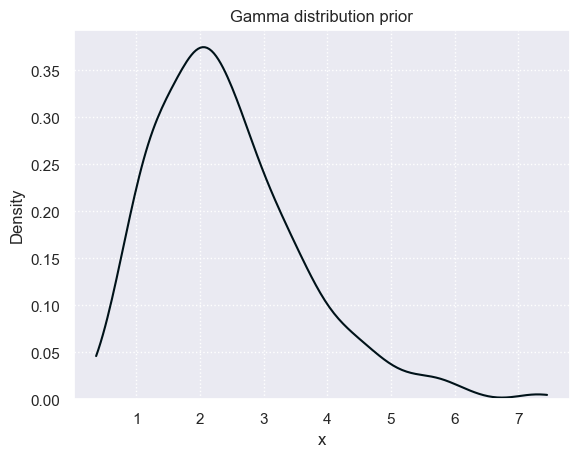

In [8]:
plt.figure()
ax = plt.gca()
ax.set_prop_cycle(linestyle_cycler)
sns.kdeplot(trace["prior"]["gamma"].values.flatten(), cut=0)

plt.xlabel("x")
plt.title("Gamma distribution prior")

# Expanding the model

Use the gamma dist to feed into the Poisson dist

$$
f(x | \mu) = \frac{e^{-\mu} \mu^x}{x!}
$$

where:
- $\mu$ is the average rate of occurrence (also known as the Poisson parameter),



In [9]:
with pm.Model() as model2:
    mu = pm.Gamma("mu", alpha, beta)
    x = pm.Poisson("x", mu)
    trace2 = pm.sample_prior_predictive(1000)

Sampling: [mu, x]


In [10]:
trace2

Inference data with groups:
	> prior

In [11]:
trace2["prior"]["mu"].mean()

<xarray.DataArray 'mu' ()> Size: 8B
array(2.41420963)

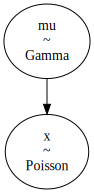

In [12]:
pm.model_to_graphviz(model2)

Text(0.5, 0, 'x')

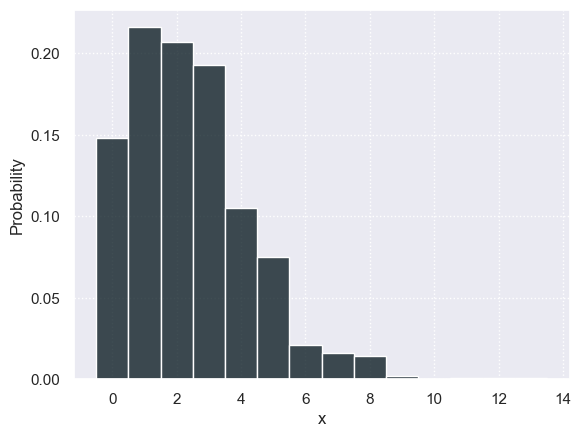

In [13]:
plt.figure()
ax = plt.gca()
ax.set_prop_cycle(linestyle_cycler)
sns.histplot(trace2["prior"]["x"].values.flatten(), stat="probability", discrete=True)
plt.xlabel("x")

# Conditioning the model

In `model2` let us say that we have observed `x` 4 times. We now proceed to condition the model on the data

In [14]:
with pm.Model() as model3:
    mu = pm.Gamma("mu", alpha, beta)
    x = pm.Poisson("x", mu, observed=4)
    trace3 = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 1 seconds.


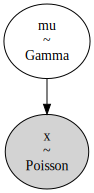

In [26]:
pm.model_to_graphviz(model3)

In [15]:
trace3

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [16]:
trace3["posterior"]["mu"].mean()

<xarray.DataArray 'mu' ()> Size: 8B
array(3.00019938)

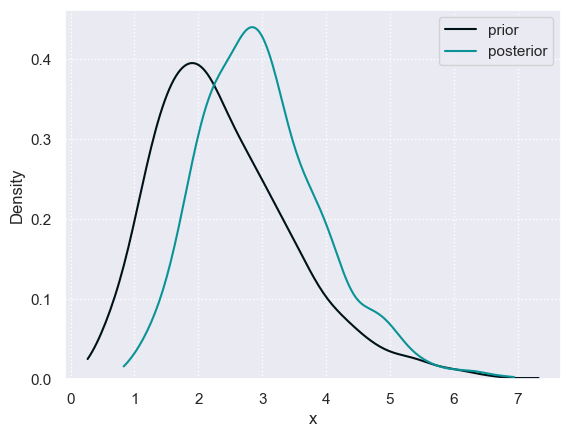

In [17]:
plt.figure()
ax = plt.gca()
ax.set_prop_cycle(linestyle_cycler)
sns.kdeplot(trace2["prior"]["mu"].values.flatten(), cut=0, label="prior")
sns.kdeplot(trace3["posterior"]["mu"].values.flatten(), cut=0, label="posterior")

plt.xlabel("x")
plt.legend()

Sampling: [x]


Output()

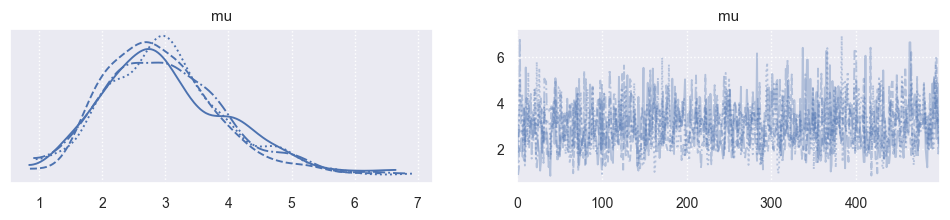

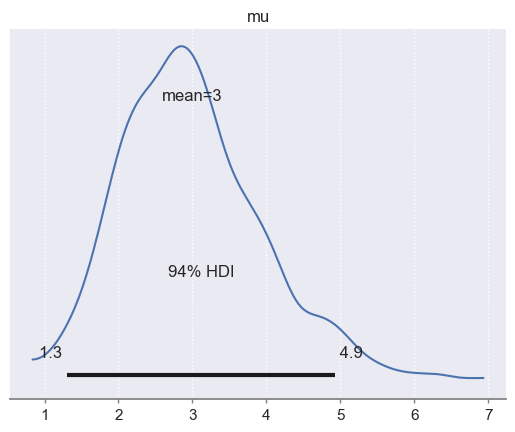

In [18]:
with model3:
    az.plot_trace(trace3)
    az.plot_posterior(trace3['posterior'])
    posterior_prediction = pm.sample_posterior_predictive(trace3)

In [19]:
posterior_prediction

Inference data with groups:
	> posterior_predictive
	> observed_data

Text(0.5, 0, 'x')

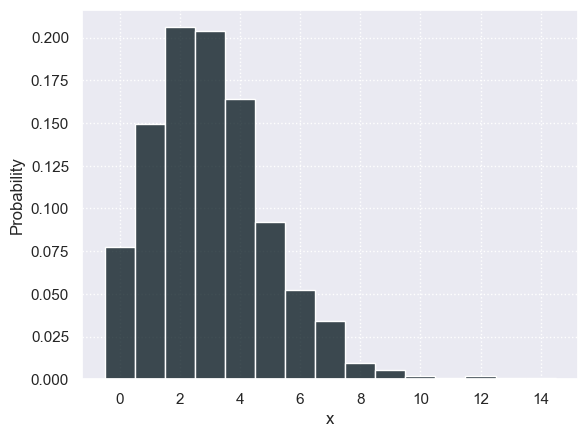

In [24]:
plt.figure()
ax = plt.gca()
ax.set_prop_cycle(linestyle_cycler)
sns.histplot(posterior_prediction["posterior_predictive"]["x"].values.flatten(), stat="probability", discrete=True)
plt.xlabel("x")